In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from statsmodels.formula.api import *
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import lightgbm 
from lightgbm import LGBMRegressor

In [2]:
def pre_processing(name):
    # load data
    data = pd.read_csv(name)
    data = data.iloc[:, 1:]
    data.info()
    
    data["city"] = data["city"].astype("category")
    data["category"] = data["category"].astype("category")
    data["county_number"] = data["county_number"].astype("category")
    data["item_number"] = data["item_number"].astype("category")
    data["store_number"] = data["store_number"].astype("category")
    data["encoded_city"] = data["encoded_city"].astype("category")
    data["population"] = data["population"].astype("int")
    return data

data_train = pre_processing("data_200k_latest.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           200000 non-null  int64  
 1   month          200000 non-null  int64  
 2   day            200000 non-null  int64  
 3   latitude       200000 non-null  float64
 4   longitude      200000 non-null  float64
 5   week_of_day    200000 non-null  int64  
 6   pack           200000 non-null  int64  
 7   city           200000 non-null  object 
 8   category       200000 non-null  int64  
 9   county_number  200000 non-null  int64  
 10  county         200000 non-null  object 
 11  store_num      200000 non-null  int64  
 12  item_number    200000 non-null  int64  
 13  bottle_volume  200000 non-null  int64  
 14  cost_price     200000 non-null  float64
 15  retail_price   200000 non-null  float64
 16  volume_sold    200000 non-null  float64
 17  store_number   200000 non-nul

In [3]:
X = data_train[['week_of_day', 'pack', 'store_num', 'bottle_volume', 
                'cost_price', 'retail_price', 'population', 'encoded_city',
                'category', 'county_number', 'store_number', 'item_number']]

y = data_train.volume_sold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [4]:
depth = 16
leaves = 99

lgbm_model = LGBMRegressor(max_depth= depth,num_leaves = leaves,random_state= 100)
lgbm_model.fit(X_train, y_train)

LGBMRegressor(max_depth=16, num_leaves=99, random_state=100)

In [5]:
features = list(X.columns)
importance = list(lgbm_model.feature_importances_)
importance_dict = {}
for i in range(len(features)):
    importance_dict[features[i]] = importance[i]
importance = sorted(importance_dict.items(), key = lambda item: abs(item[1]), reverse = True)
importance

[('store_number', 2543),
 ('item_number', 2076),
 ('category', 989),
 ('encoded_city', 745),
 ('retail_price', 734),
 ('population', 674),
 ('cost_price', 621),
 ('county_number', 436),
 ('bottle_volume', 362),
 ('week_of_day', 271),
 ('pack', 186),
 ('store_num', 163)]

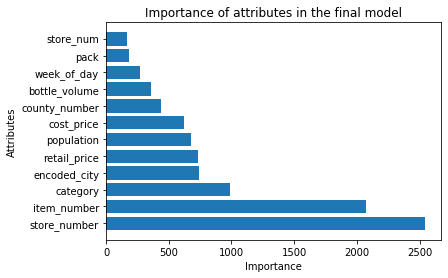

In [6]:
# Importance of attributes
x = []
y = []
for i in range(len(importance)):
    x.append(importance[i][1])
    y.append(importance[i][0])
plt.barh(y, x)
plt.xlabel("Importance")
plt.ylabel("Attributes")
plt.title("Importance of attributes in the final model")
plt.show()